In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


<h1 style="text-align:center; color:#000080; font-weight:bold; font-size:38px;">Hotel Reservations Prediction</h1>

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:30px;">Dataset Description</h1>

- **Booking_ID**: Unique identifier for each booking.
- **no_of_adults**: Number of adults included in the booking.
- **no_of_children**: Number of children included in the booking.
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) booked or stayed.
- **no_of_week_nights**: Number of weekday nights (Monday to Friday) booked or stayed.
- **type_of_meal_plan**: Type of meal plan selected. Possible values include [e.g., "No Meal Plan," "Breakfast Only," etc.].
- **required_car_parking_space**: Indicates whether a parking space is required (0 = No, 1 = Yes).
- **room_type_reserved**: Type of room reserved (encoded by INN Hotels; mapping unavailable).
- **lead_time**: Number of days between booking and arrival.
- **arrival_year**: Year of arrival.
- **arrival_month**: Month of arrival.
- **arrival_date**: Day of the month for arrival.
- **market_segment_type**: Market segment type. Possible values include [e.g., "Direct," "Corporate," etc.].
- **repeated_guest**: Indicates whether the customer is a repeated guest (0 = No, 1 = Yes).
- **no_of_previous_cancellations**: Number of bookings previously canceled by the customer.
- **no_of_previous_bookings_not_canceled**: Number of bookings previously completed by the customer.
- **no_of_special_requests**: Number of special requests made by the customer.
- **booking_status**: Target variable indicating if the booking was canceled (0 = Not Canceled, 1 = Canceled).
</span>

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Import Libraries</h1>

In [2]:
# Cleaning and Viualization Libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.subplots as sp
import plotly.colors as cl
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import re

In [3]:
# ml tools
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                   RobustScaler,
                                   LabelEncoder,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import ( cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV,
                                     StratifiedKFold,
                                    RandomizedSearchCV)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline , make_pipeline
from scipy.stats import randint
from scipy import stats
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.impute import SimpleImputer

In [4]:
#Classification models
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import (SGDClassifier, LogisticRegression, 
                                        LinearRegression,Ridge, Lasso, ElasticNet)

from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,
                                    GradientBoostingClassifier, AdaBoostRegressor)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [5]:
#Regression models
from sklearn.ensemble import (RandomForestRegressor,
                                ExtraTreesRegressor,
                                BaggingRegressor,
                                GradientBoostingRegressor,
                                HistGradientBoostingRegressor)

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
# metrics
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             log_loss,
                             classification_report,
                             confusion_matrix)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Remove Warnings</h1>

In [6]:
import warnings
warnings.simplefilter("ignore")

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Reading The Data</b></div>

In [7]:
df = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')

In [8]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Some Information About Data</b></div>

In [9]:
df.shape

(36275, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* **that's great no missing value**
* **the data type of columns are fixed but must make encoding**

In [11]:
num_cols = df.select_dtypes(include=['number'])\
                .columns.difference(['Booking_ID']).tolist()
cat_cols = df.select_dtypes(include=['object', 'category'])\
                .columns.difference(['Booking_ID']).tolist()

In [12]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':\n{unique_values}\n")

In [13]:
show_unique_values(df[cat_cols])

Unique values in 'booking_status':
['Not_Canceled' 'Canceled']

Unique values in 'market_segment_type':
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

Unique values in 'room_type_reserved':
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Unique values in 'type_of_meal_plan':
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']



In [14]:
def unique_counts(df):
    num_unique = df.nunique().sort_values(ascending=False)
    pct_unique = ((df.nunique().sort_values(ascending=False) / len(df)) * 100).round(3)
    pct_unique = pct_unique.astype(str) + '%'
    
    unique = pd.DataFrame({
        'Unique Count': num_unique,
        'Percentage Unique': pct_unique
    })

    return unique

In [15]:
unique_counts(df)

,Unique Count,Percentage Unique
Booking_ID,36275,100.0%
avg_price_per_room,3930,10.834%
lead_time,352,0.97%
no_of_previous_bookings_not_canceled,59,0.163%
arrival_date,31,0.085%
no_of_week_nights,18,0.05%
arrival_month,12,0.033%
no_of_previous_cancellations,9,0.025%
no_of_weekend_nights,8,0.022%
room_type_reserved,7,0.019%


`we need to drop Booking_ID column becaues ecah value in it is unique`

In [16]:
df.drop('Booking_ID', axis=1, inplace=True)

In [17]:
def calculate_missing_data(df):

    missing_ratio = (df.isnull().sum() / len(df)) * 100

    missing_data = missing_ratio[missing_ratio > 0]

    missing_data_df = pd.DataFrame({'Missing Ratio %': missing_data}).sort_values('Missing Ratio %', ascending=False)

    return missing_data_df   

In [18]:
calculate_missing_data(df)

,Missing Ratio %


`no missing value that's great`

In [19]:
df.duplicated().sum()

10275

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Summary statistics of the data</b></div>

In [20]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [21]:
df.describe(include = 'object')

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,27835,28130,23214,24390


`we see some of column not balanced we must carry about this`

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Split The Data</b></div>

In [22]:
X = df.drop('booking_status',axis=1)
y = df[['booking_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [23]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9078,2,0,1,2,Meal Plan 1,0,Room_Type 1,273,2018,5,13,Offline,0,0,0,95.00,0,Canceled
36042,2,0,1,3,Meal Plan 1,0,Room_Type 1,158,2018,6,30,Online,0,0,0,90.95,1,Canceled
5929,2,0,2,1,Meal Plan 1,0,Room_Type 1,59,2018,11,26,Online,0,0,0,93.60,1,Not_Canceled
6928,1,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,10,25,Aviation,0,0,0,95.00,0,Not_Canceled
34607,2,2,2,4,Meal Plan 1,0,Room_Type 6,54,2018,4,29,Online,0,0,0,187.85,0,Canceled


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Data Exploration</b></div>

In [24]:
train_cop = train.copy()

In [25]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
            'market_segment_type', 'repeated_guest', 'booking_status']
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
           'arrival_year','arrival_month','arrival_date','lead_time','no_of_previous_cancellations', 
          'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b> Univariate Analysis</b></div>

## Num Feature

In [26]:
def num_plot_dist(df, num_features):
        fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
        if len(num_features) == 1:
            axes = [axes] 
        for i, column in enumerate(num_features):
            sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
            axes[i][0].set_title(f'Histogram with KDE for {column}')
            
            sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
            axes[i][1].set_title(f'Box Plot for {column}')
        
        plt.tight_layout()
        plt.show()

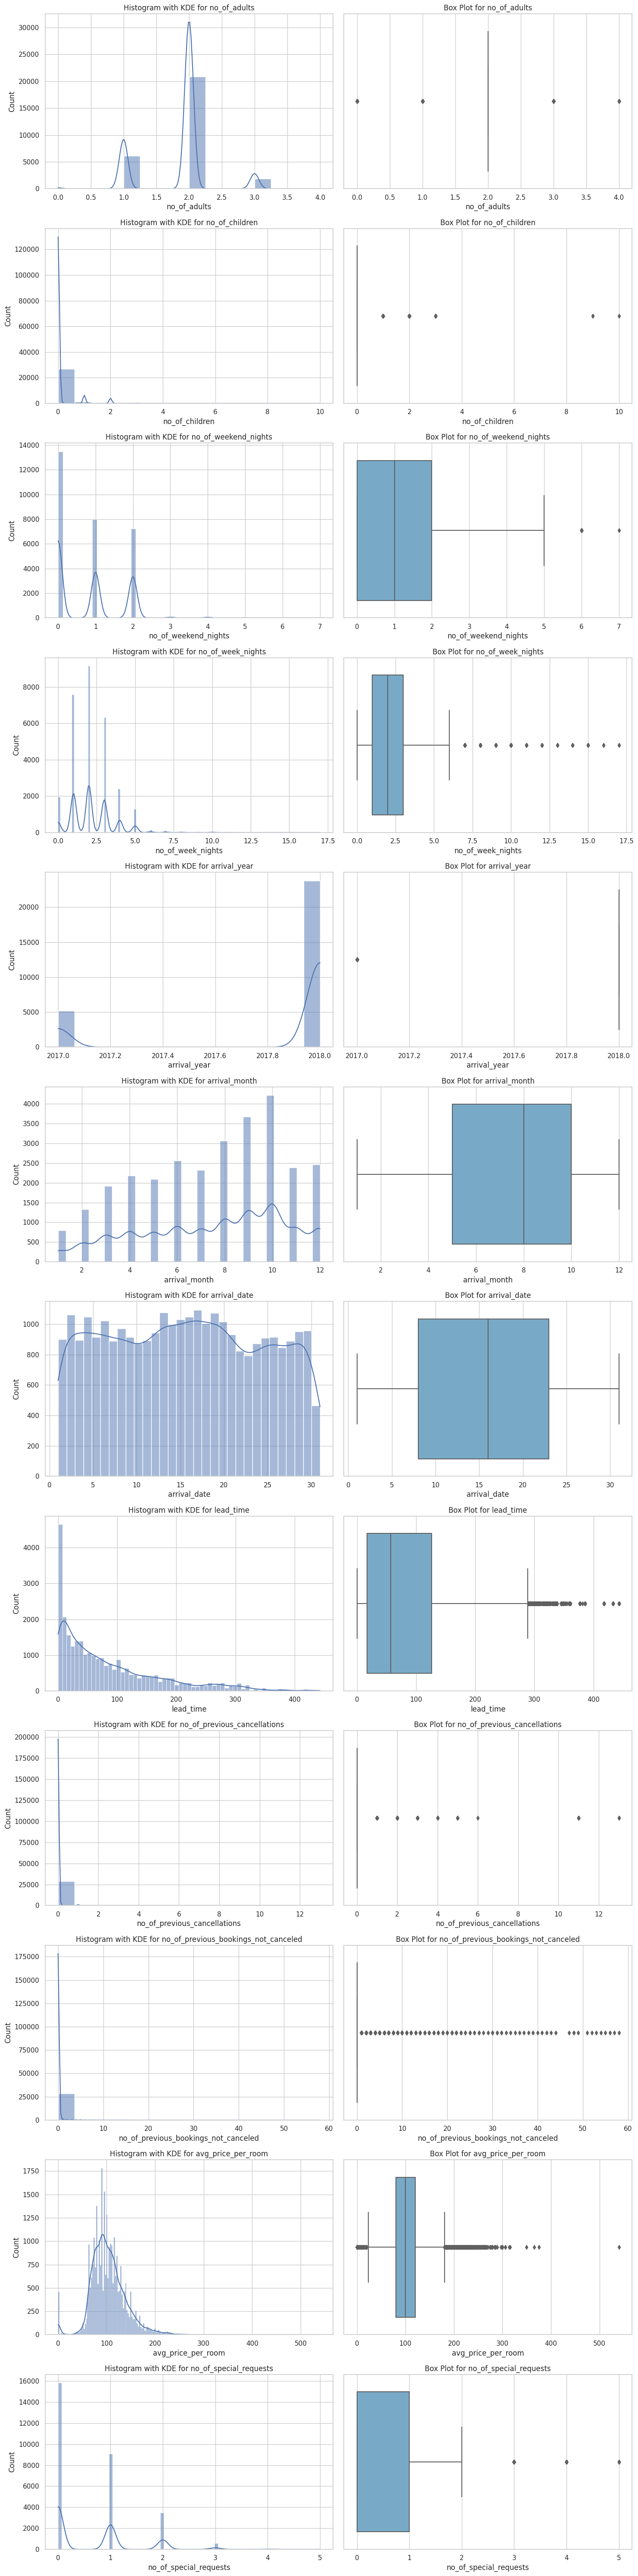

In [27]:
num_plot_dist(train_cop, num_cols)

* **`no_of_adults`:Most users keep their bookings simple without special requests. The outliers suggest a small group of customers with unique needs, which could be further analyzed for personalization strategies.**
* **`no_of_children`:The vast majority of bookings are for adults only, with a small number of bookings including children. This suggests a strong preference for adult-only travel and highlights a niche market for family-friendly accommodations.**
* **`no_of_weekend_nights`:The majority of bookings are for short weekend stays, with a few outliers indicating longer weekend getaways. This suggests a preference for quick weekend escapes and a niche market for extended weekend trips.**
* **`no_of_special_requests`:The vast majority of bookings have no special requests, with a few outliers indicating bookings with multiple special requests. This suggests that most customers have simple booking needs, while a small segment requires additional accommodations or preferences.**
* **`arrival_month`: The data indicates a clear seasonal pattern in bookings. There's a significant increase in bookings from July to August, peaking in August. This peak period is then followed by a decline in bookings, suggesting a potential high season for the business during these months.**
* **`avg_price_per_room`:a majority of rooms being more affordable and a smaller number of high-priced rooms.icantly higher prices.**

In [28]:
df[df['no_of_adults']==0]['no_of_children'].value_counts()

no_of_children
2    133
3      5
1      1
Name: count, dtype: int64

`the some chlidren can booking so when no_of_adults = 0 the no_of_children > 0`

## Cat Feature

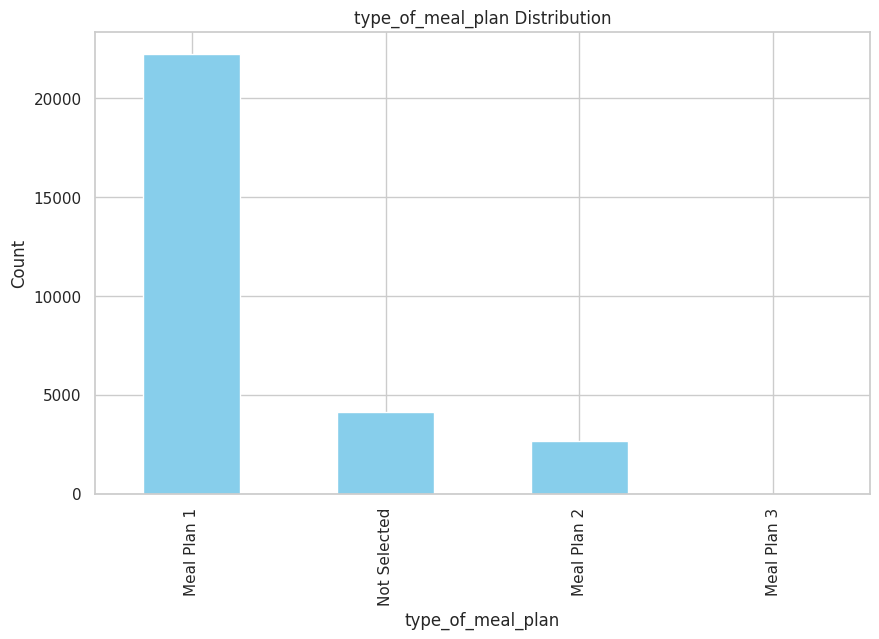

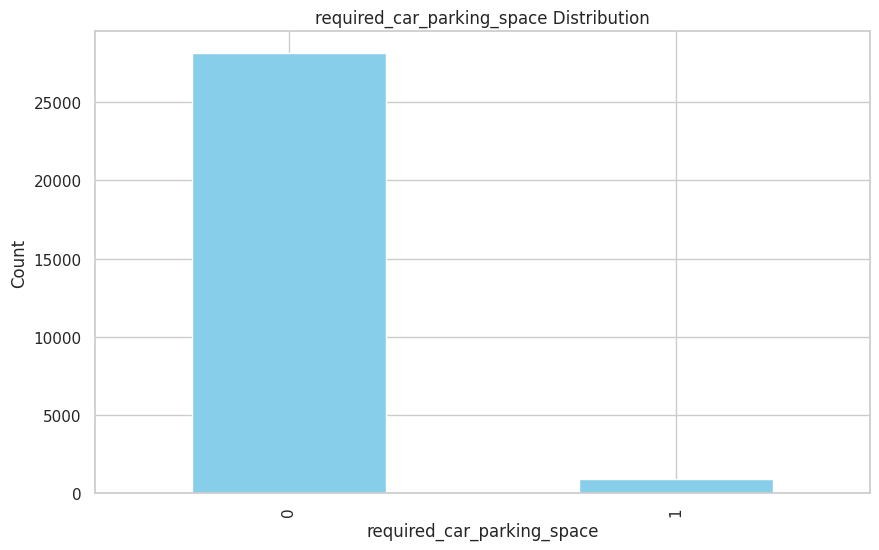

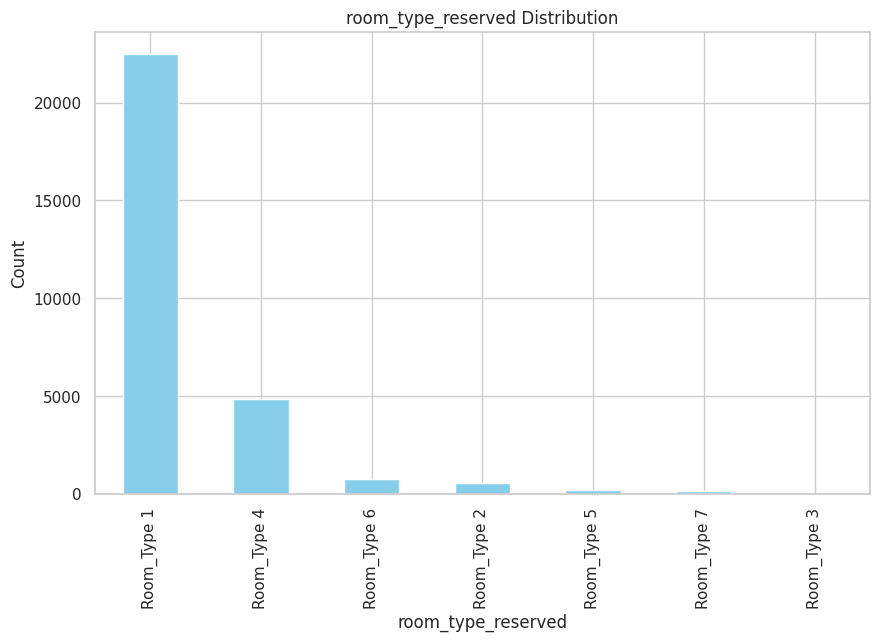

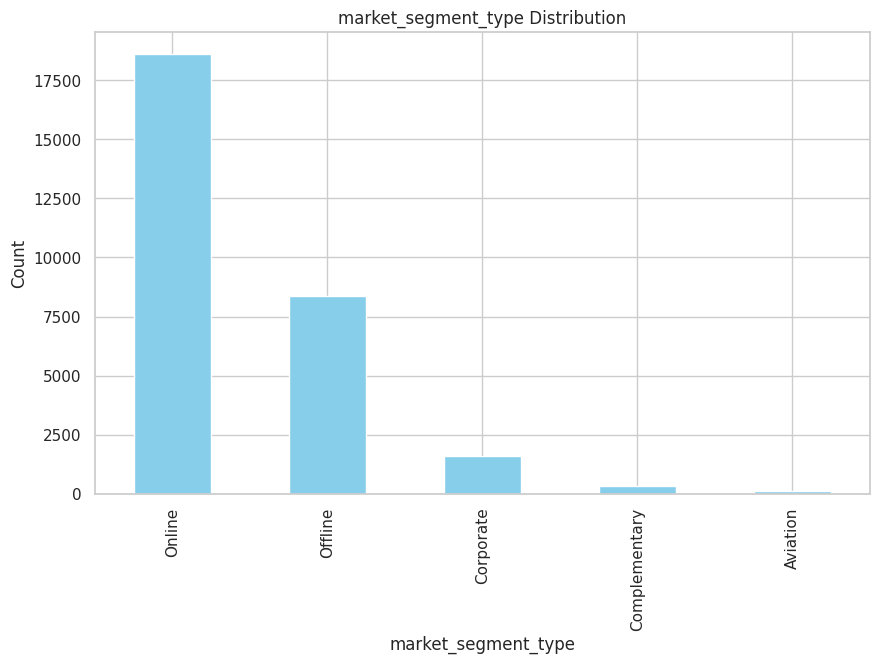

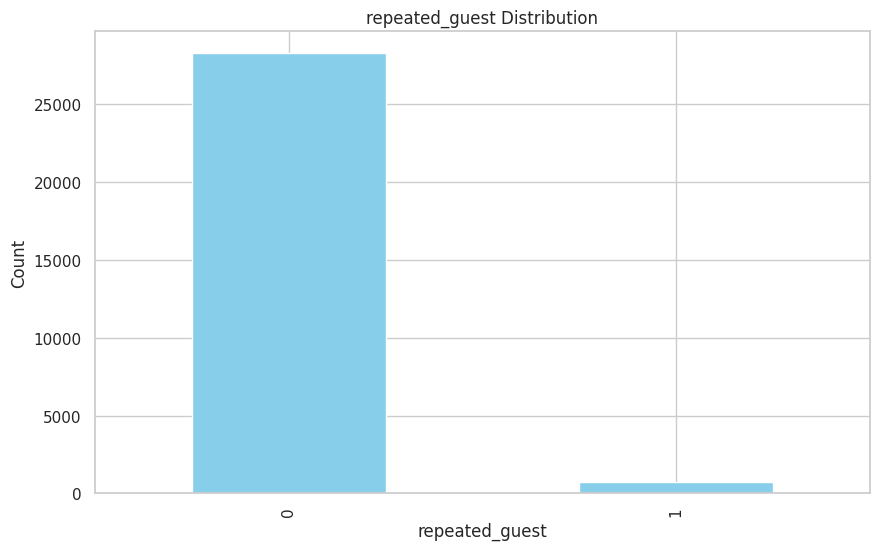

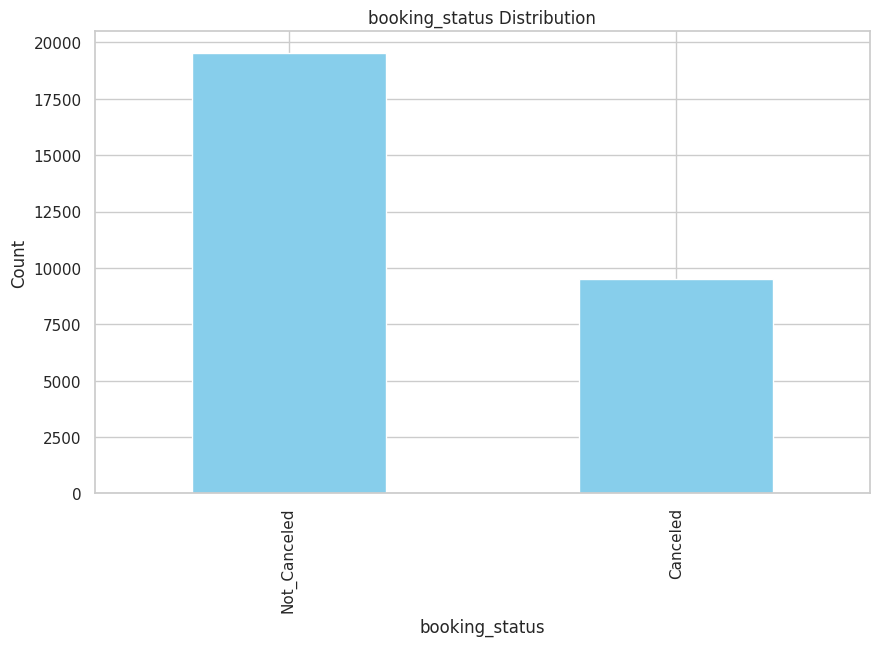

In [29]:
for cat_feature in cat_cols:
        plt.figure(figsize=(10, 6))
        train_cop[cat_feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'{cat_feature} Distribution')
        plt.xlabel(cat_feature)
        plt.ylabel('Count')
        plt.show()


* **there's imbalanced data so we must carry about it**

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Bivariate Analysis</b></div>

## Num Feature

In [30]:
def plot_box_target(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2  
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f'{column} vs {target}')
    
    plt.tight_layout()
    plt.show()


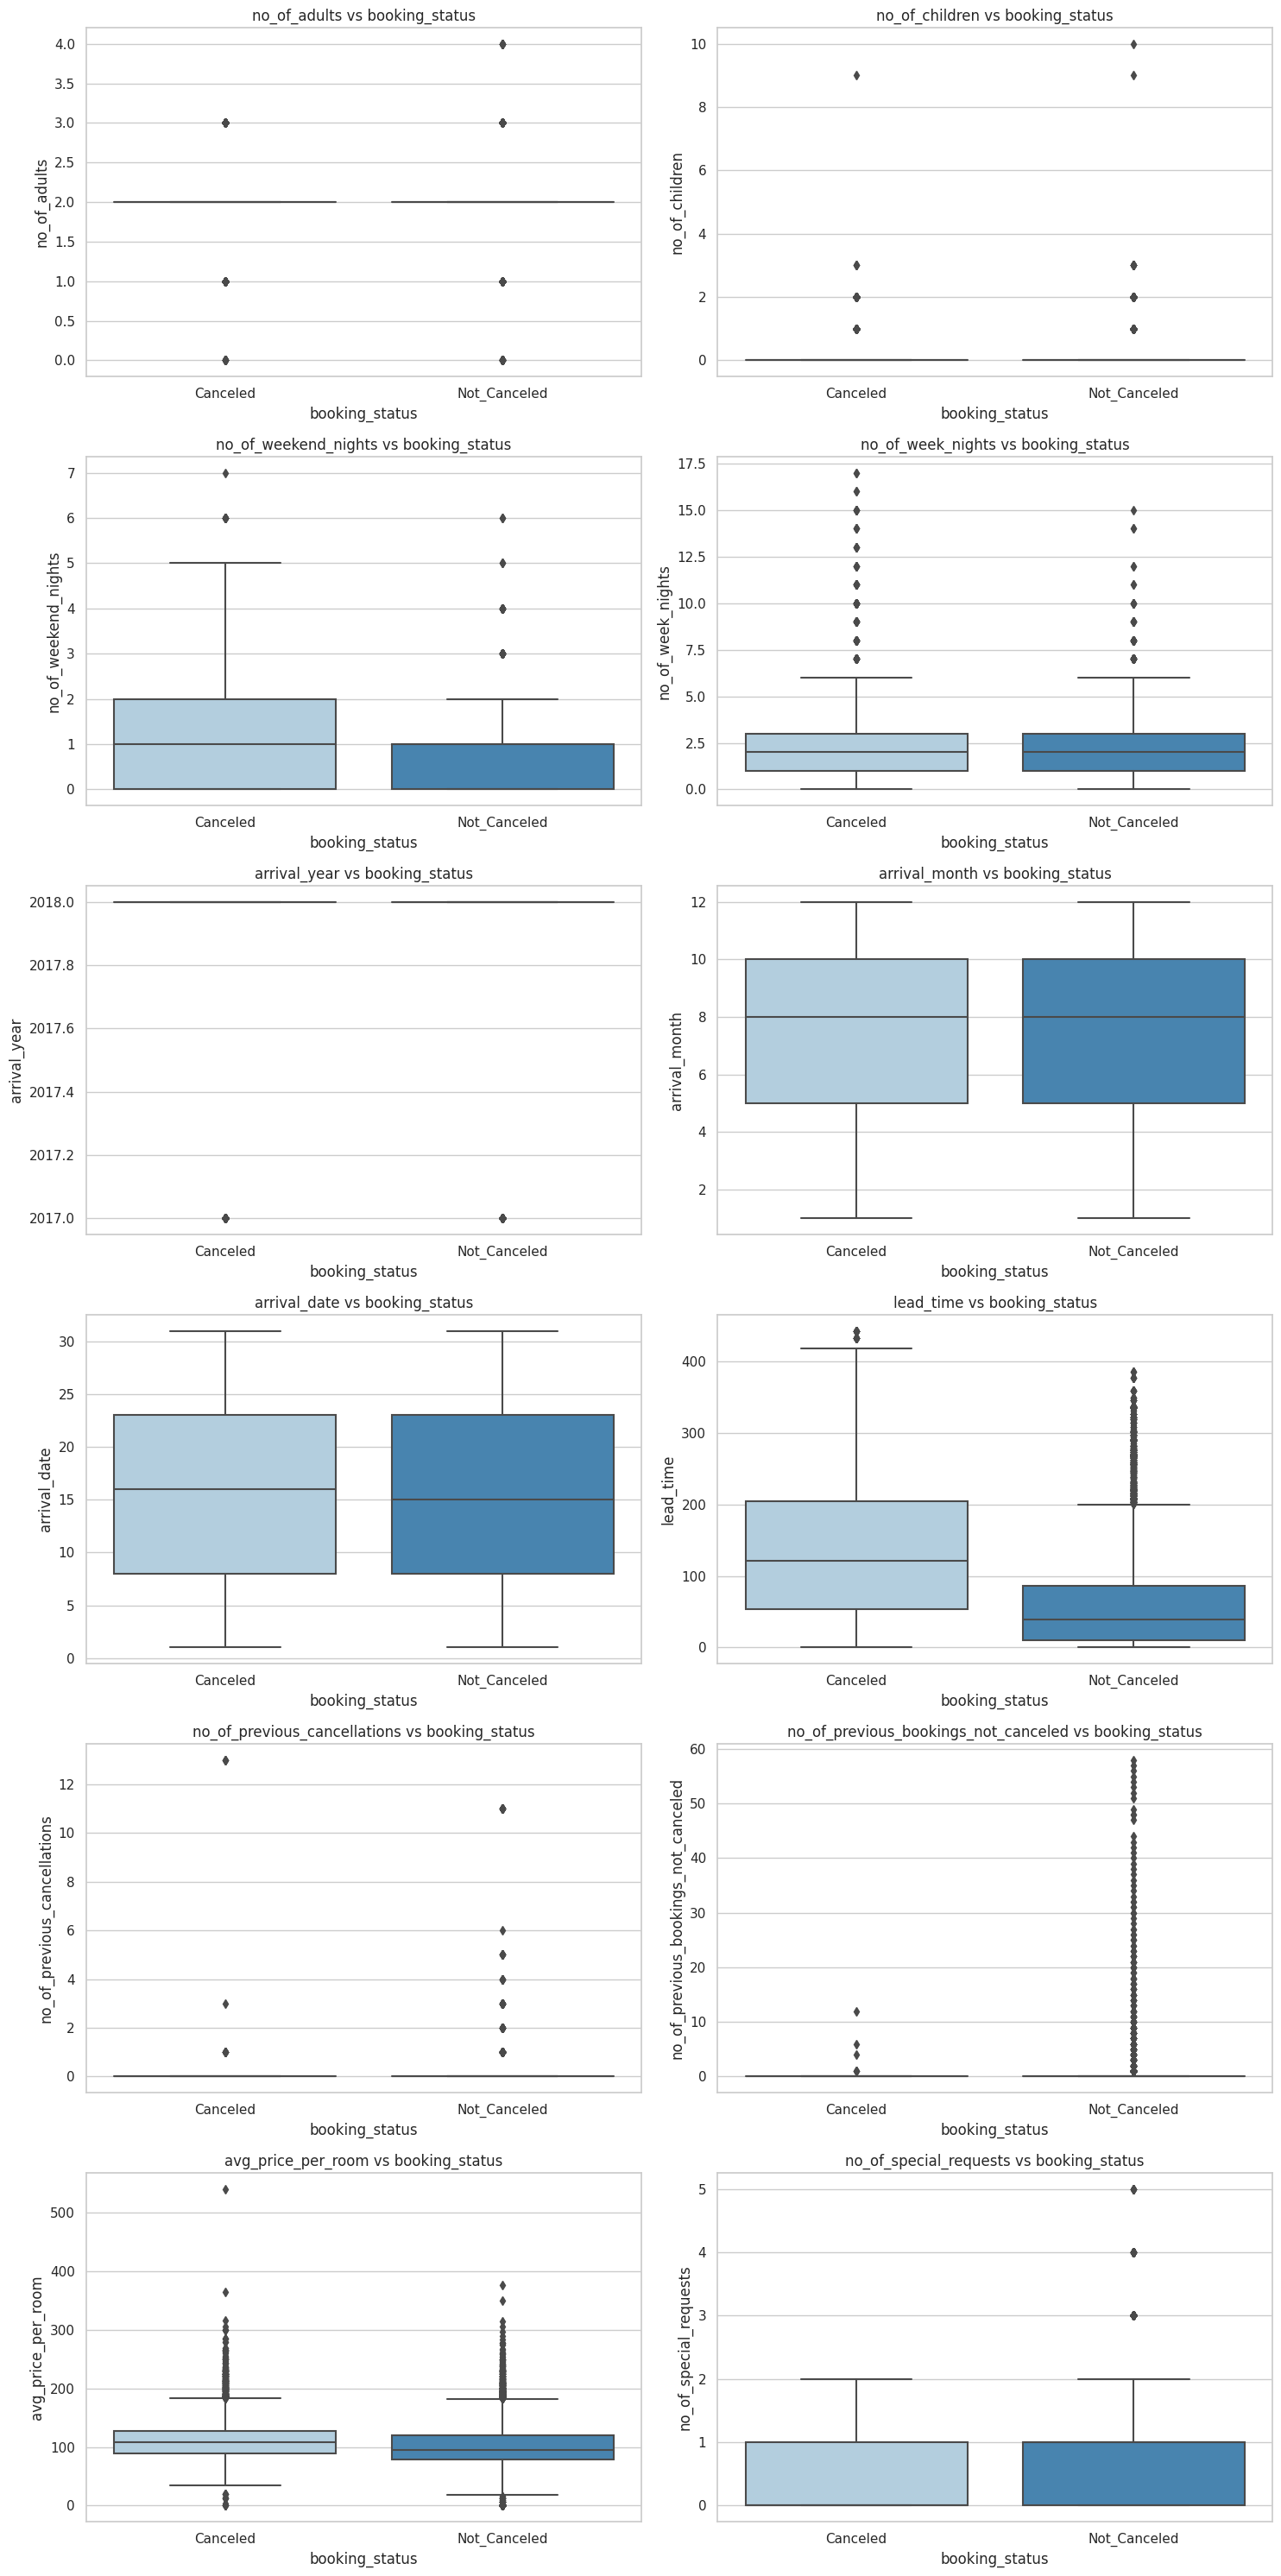

In [31]:
plot_box_target(train_cop, 'booking_status', num_cols)


- **Number of Adults and Children**: These features show similar distributions for canceled and not-canceled bookings, indicating they are not strong predictors of cancellation.

- **Number of Weekend and Week Nights**: Both show similar distributions for canceled and not-canceled bookings, suggesting they do not significantly predict cancellations.

- **Lead Time**: Canceled bookings tend to have longer lead times, implying that longer booking horizons may correlate with a higher risk of cancellation.

- **Previous Cancellations**: Customers with a history of cancellations are more likely to cancel again, making past cancellations a strong predictor of future cancellations.

- **Previous Non-Canceled Bookings**: Customers with more non-canceled bookings are less likely to cancel, indicating past non-cancellations are a good predictor of future behavior.

- **Number of Special Requests**: The number of special requests has little impact on cancellation rates, suggesting it is not a key predictor of cancellations.

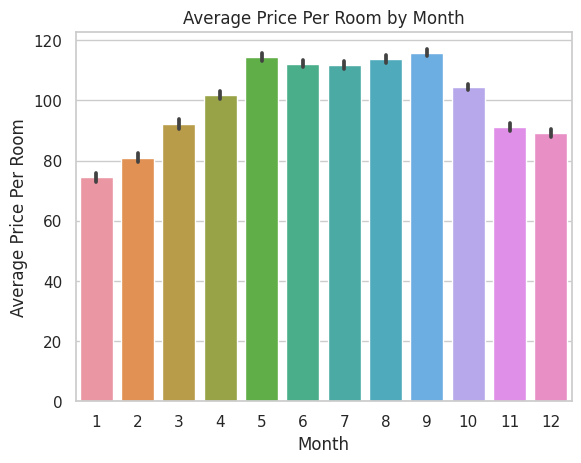

In [32]:
sns.barplot(x='arrival_month', y='avg_price_per_room',data=train_cop)


plt.xlabel('Month')
plt.ylabel('Average Price Per Room')
plt.title('Average Price Per Room by Month')
plt.show()

* **The price tends to higher during holiday seasons(5-9)months the price increase from 1-6 and dcrease again from 9-12**
* **will divid the months to seasons**

In [33]:
conditions = [
    (train_cop['arrival_month'] <= 3),
    (train_cop['arrival_month'] > 3) & (train_cop['arrival_month'] <= 6),
    (train_cop['arrival_month'] > 6) & (train_cop['arrival_month'] <= 9),
    (train_cop['arrival_month'] >= 10)
    ]
values = ['Q2', 'Q3', 'Q4', 'Q1']
train_cop['quarter'] = np.select(conditions, values)
cat_cols.append('quarter')

## Cat Feature

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cat_features_with_target(df, target, cat_features):
    num_features = len(cat_features)

    num_row = (num_features + 1) // 2

    fig, axes = plt.subplots(num_row, 2, figsize=(12, num_row * 5))
    
    
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()



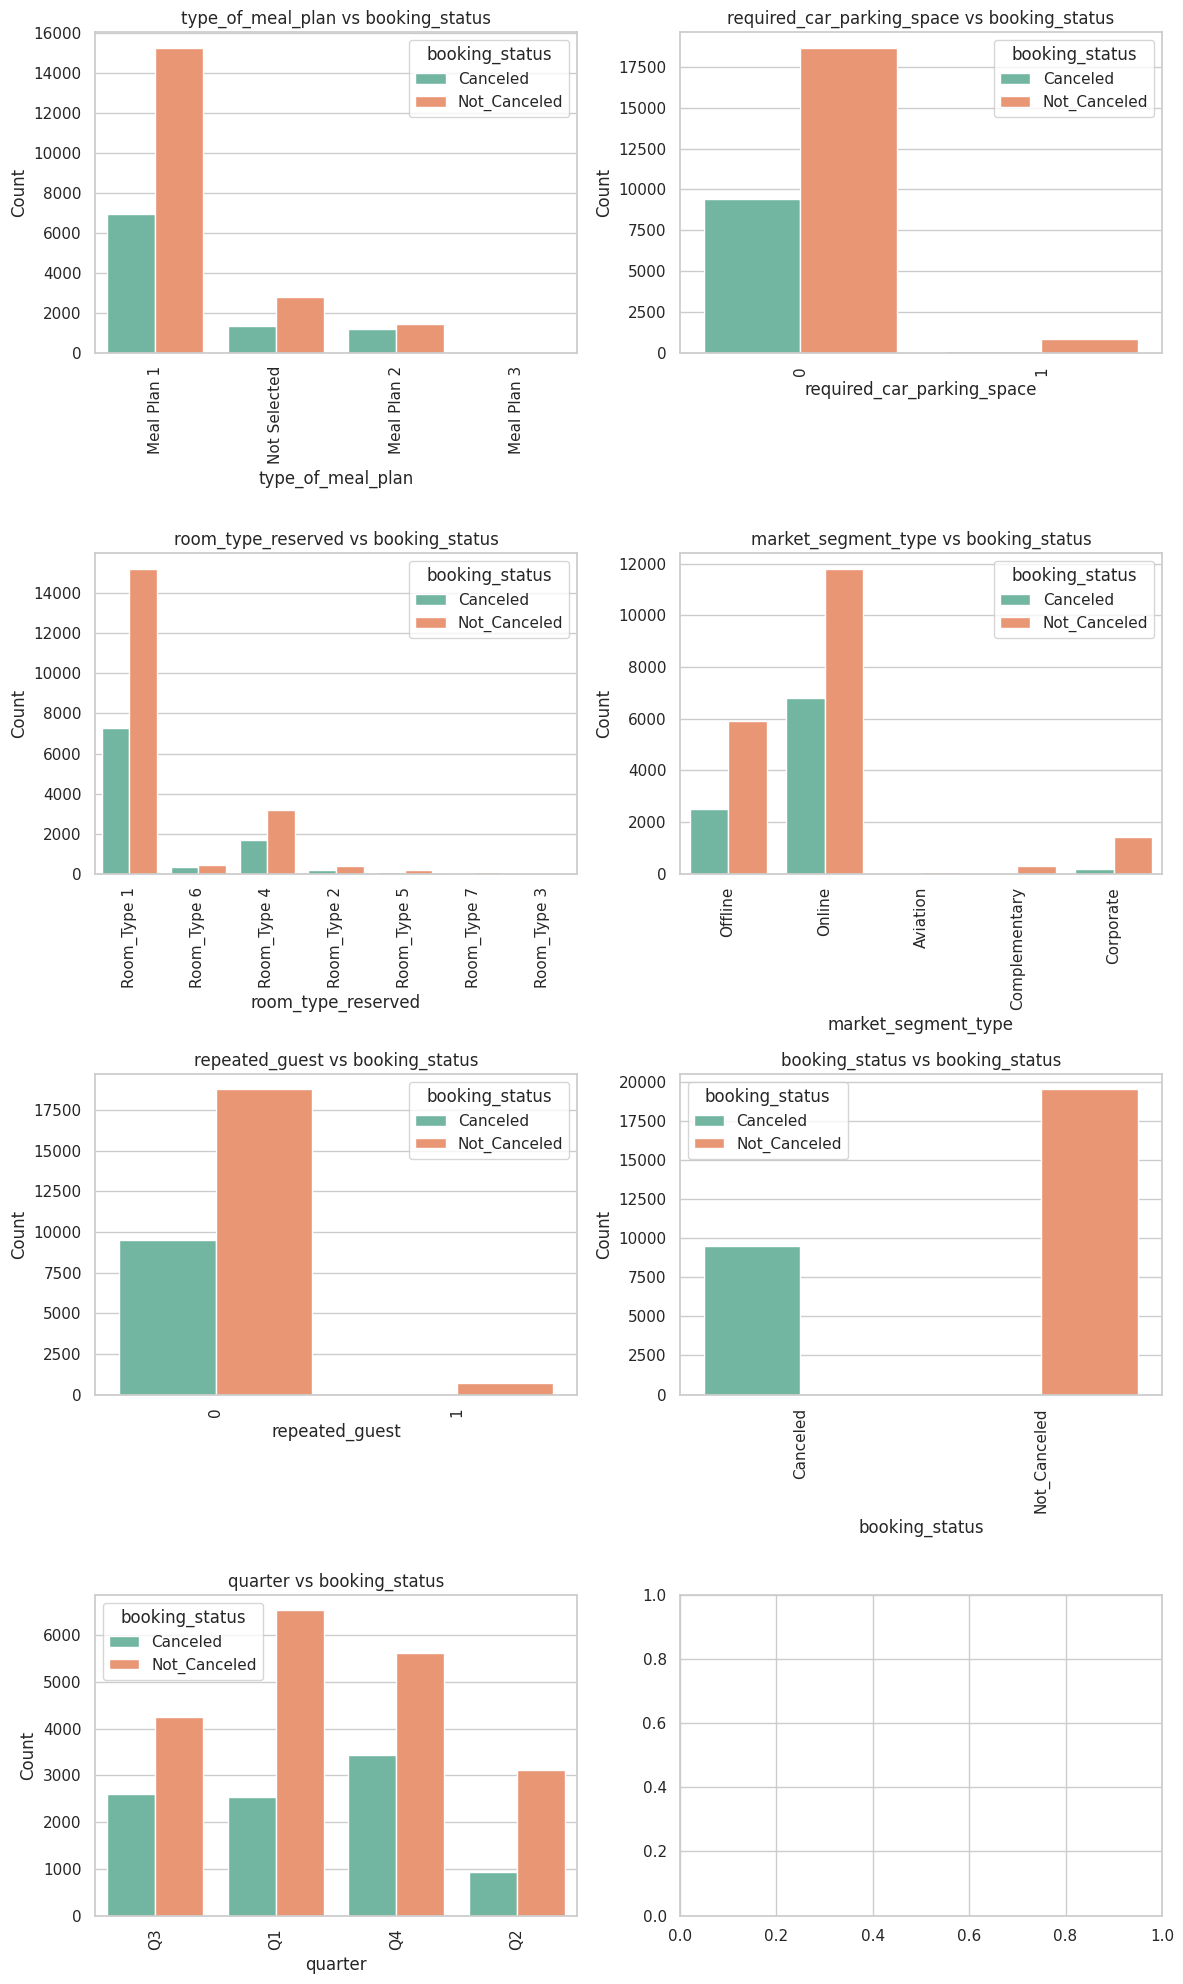

In [35]:
plot_cat_features_with_target(train_cop, 'booking_status', cat_cols)

### Booking Cancellation Insights

- **Meal Plan**: Customers who choose "Not Selected" for their meal plan have a lower cancellation rate compared to those selecting a specific meal plan.
  
- **Car Parking**: Guests who require car parking spaces tend to not cancel their bookings as frequently as those who do not require parking spaces.

- **Room Type**: "Room Type 1" has the highest cancellation rate.

- **Market Segment**: "Complementary" bookings have a very low cancellation rate, while "Online" bookings tend to have a higher cancellation rate compared to offline bookings, possibly due to ease of cancellation, price comparisons, or flexible policies.

- **Repeated Guests**: Repeated gunoe a higher cancellation rate compared to first-time guests.

- **Data Imbalance**: There is a clear imbalance in the data, with more not-canceled bookings than canceled ones, which may affect the analysis of cancellation predictors.
predictors.


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Data Preprocessing</b></div>

* ### Dropping any column which has 80% of values with the same value 

In [36]:
def get_frequency_dataframes(df, cat_cols):


        freq_dfs = [
            df.groupby([cat_column]).size().reset_index(name="count")
            for cat_column in cat_cols
        ]

        return freq_dfs, num_cols, cat_cols    

In [37]:
freq_dfs, _, _= get_frequency_dataframes(train_cop, cat_cols)

In [38]:
def drop_high_frequency_columns(freq_dfs, df, threshold=0.8):
     
        for count_df in freq_dfs:
            highest_freq_percentage = (count_df["count"] / df.shape[0]).max()
            if highest_freq_percentage >= threshold:
                col_to_drop = count_df.columns[0]
                print(f'We will drop the column "{col_to_drop}" due to high frequency.')
                df = df.drop(columns=[col_to_drop])
        return df

In [39]:
_ = drop_high_frequency_columns(freq_dfs, train_cop)

We will drop the column "required_car_parking_space" due to high frequency.
We will drop the column "repeated_guest" due to high frequency.


- **We can drop (required_car_parking_space, repeated_guest) but it will important feature because the pepole whoe required parking and repeated_guest not cancellation booking**

## Removing the multi-collinearity from the data

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def drop_high_vif_features(X_train, vif_threshold=20):

    feats_high_vif_to_be_dropped = []  # List to store the names of features dropped
    cleaned_df_from_multi_coll = X_train.copy()  # Start with a copy of the original dataframe
    num_cols_removed = 0  # Initialize a counter for the number of columns removed
    
    # Loop through the features of the dataframe
    for origin_df_feat_index in range(len(X_train.columns)):
        num_cols_removed = X_train.shape[1] - cleaned_df_from_multi_coll.shape[1]
        cleaned_df_feat_index = origin_df_feat_index - num_cols_removed
        
        # Calculate the VIF for the current feature
        VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
        
        # If VIF exceeds the threshold, drop the feature
        if VIF_FEAT > vif_threshold:
            feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
            cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns=[cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])
    
    return cleaned_df_from_multi_coll, feats_high_vif_to_be_dropped

In [41]:
_, feats_high_vif_to_be_dropped = drop_high_vif_features(train_cop[num_cols])

In [42]:
feats_high_vif_to_be_dropped

['arrival_year']

`will drop arrival_year because multi-colinearity`

## Skewness

In [43]:
def skewness_heatmap(df, num_features, center_value=0):
    # Calculate skewness and prepare DataFrame
    skewness_df = pd.DataFrame(df[num_features].skew().sort_values(), columns=["Skewness"])
    
    # Create the heatmap
    sns.heatmap(skewness_df, cmap='coolwarm', annot=True, cbar=True,
                center=center_value, vmin=-abs(skewness_df).max().max(), vmax=abs(skewness_df).max().max())
    
    plt.title("Skewness Heatmap")
    plt.xlabel("Skewness")
    plt.show()

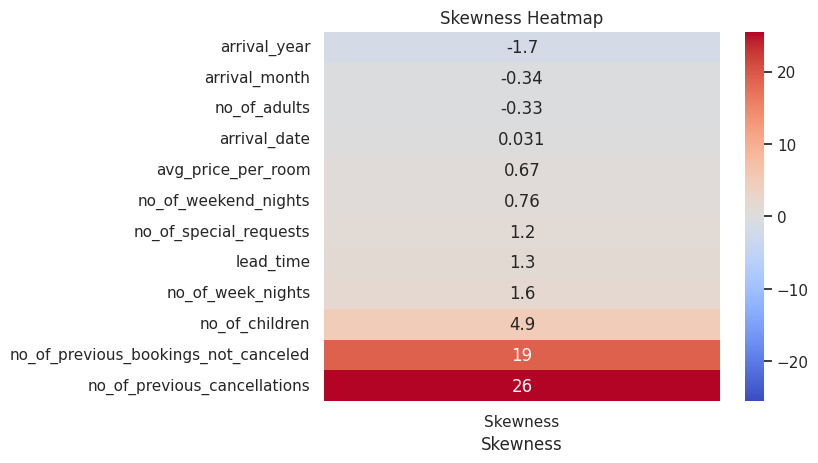

In [44]:
skewness_heatmap(train_cop, num_cols)

In [45]:
def skewness_calc(cols, df):
    skewness_dict = {}
    for col in cols:
        std_col = np.std(df[col])
        mean_col = np.mean(df[col])
        size_rows = df.count()[0]
        
        df['diff_col'] = df[col] - mean_col
        df['diff_col_powered'] = np.power(df['diff_col'], 3)
        
        skewness = np.sum(df['diff_col_powered']) / ((size_rows - 1) * np.power(std_col, 3))
        skewness_dict[col] = skewness
        
        df = df.drop(columns=['diff_col_powered', 'diff_col'])
    
    return skewness_dict

In [46]:
def skewed_data_transformation(df, skewness_dict, threshold=1):
    for col in skewness_dict:
        skewness = skewness_dict[col]
        
        # If skewness is above or below the threshold, apply transformation
        if np.abs(skewness) >= threshold:
            # Apply log transformation for positive skewness
            df[col] = df[col].apply(lambda x: np.log(1 + x) if x >= 0 else np.log(1 - x))

    
    return df

In [47]:
skewness_dict = skewness_calc(num_cols, train_cop)

In [48]:
train_cop = skewed_data_transformation(train_cop, skewness_dict)

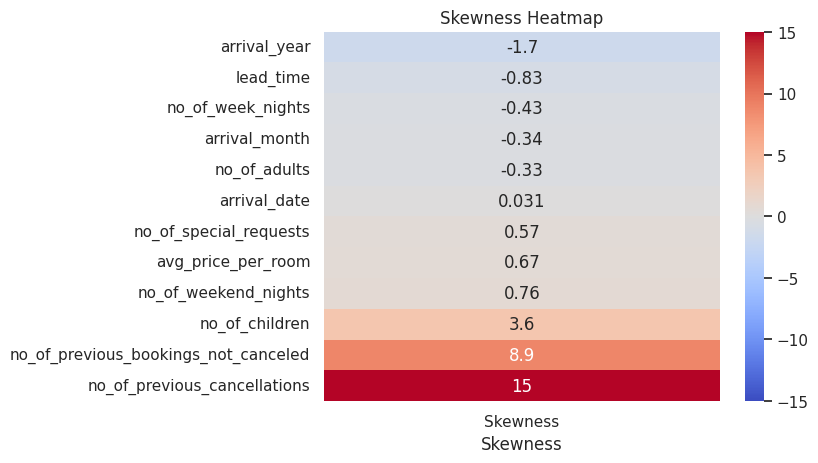

In [49]:
skewness_heatmap(train_cop, num_cols)

## Correlation

In [50]:
train_cop['booking_status'] = train_cop['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})

In [51]:
def plot_correlation_heatmap(df, num_features):
    
    corr = df[num_features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()    

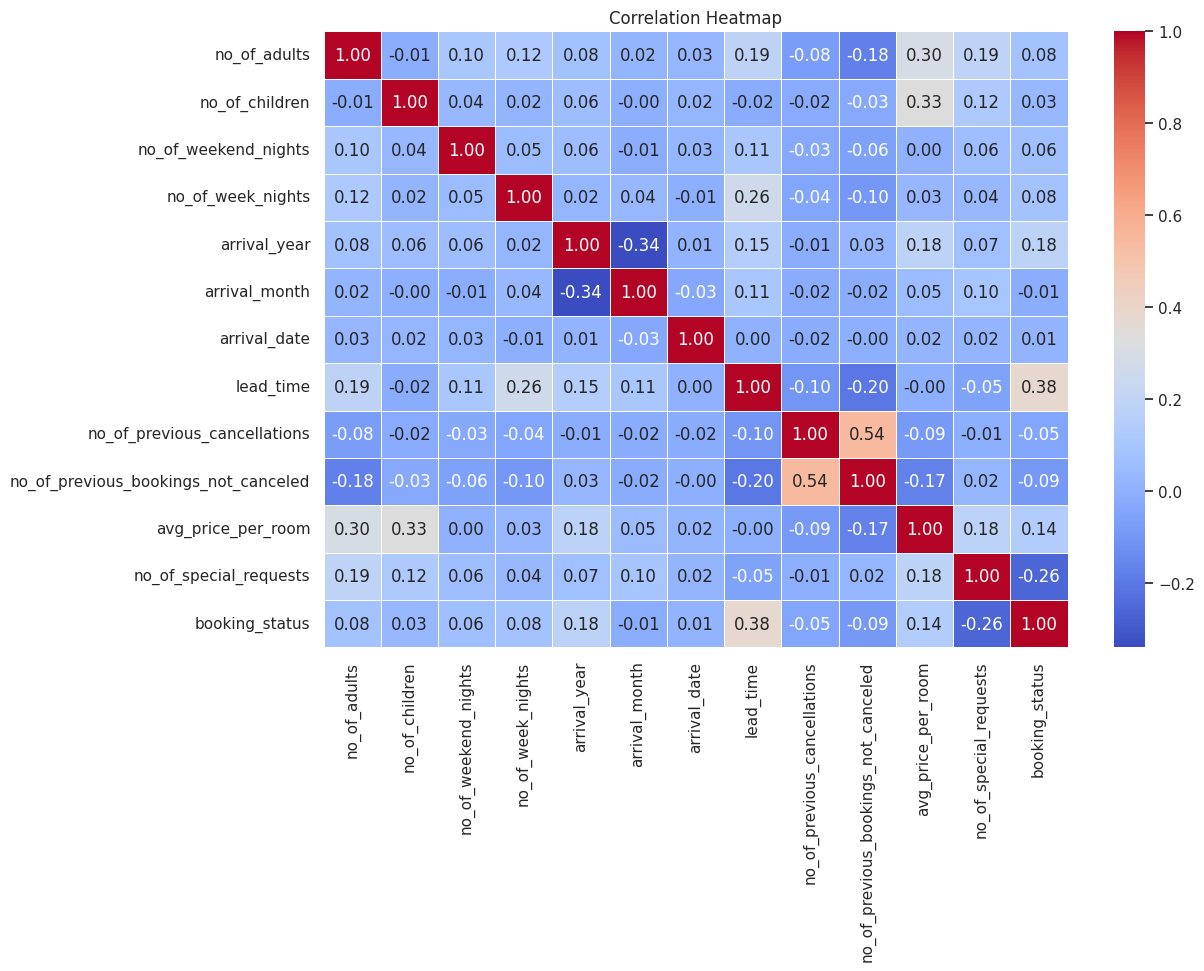

In [52]:
plot_correlation_heatmap(train_cop, num_cols + ['booking_status'])

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Pipline</b></div>

In [53]:
class ColumnSelector(TransformerMixin, BaseEstimator):

    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        X = X[self.columns]
        return X
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

In [54]:
class Transformation(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, skew_threshold=1):
        
        self.cols = cols
        self.skew_threshold = skew_threshold
        self.skewed_columns = [] 

    def fit(self, X, y=None):
        
        if self.cols is None:
            self.cols = X.select_dtypes(include=[np.number]).columns
        
        self.skewed_columns = [
            col for col in self.cols if abs(X[col].skew()) > self.skew_threshold
        ]
        return self

    def transform(self, X):
        
        X_copy = X.copy()
        for col in self.skewed_columns:
            # Apply log transformation
            X_copy[col] = np.log1p(X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
       
        return self.fit(X, y).transform(X)

In [55]:
class ScalingTransform(BaseEstimator, TransformerMixin):

    def __init__(self, cols, scaling_method):
        self.cols = cols
        self.scaler_ = None
        self.scaling_method = scaling_method

    def fit(self, X, y=None):
        if self.scaling_method == "std_scale":
            self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        elif self.scaling_method == "min_max_scale":
            self.scaler_ = MinMaxScaler().fit(X.loc[:, self.cols])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)


In [56]:
class OneHotEncodeColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        
        self.cols = cols
        self.encoder = None
        self.column_names = None

    def fit(self, X, y=None):
        
        self.encoder = OneHotEncoder(sparse=False, drop='first')
        self.encoder.fit(X[self.cols])
        self.column_names = self.encoder.get_feature_names_out(self.cols)
        return self

    def transform(self, X):
        
        X_copy = X.copy()

       
        encoded_data = self.encoder.transform(X_copy[self.cols])
        encoded_df = pd.DataFrame(encoded_data, columns=self.column_names, index=X_copy.index)

        
        X_copy = X_copy.drop(columns=self.cols)
        X_copy = pd.concat([X_copy, encoded_df], axis=1)

        return X_copy

    def fit_transform(self, X, y=None):
        
        self.fit(X, y)
        return self.transform(X)

In [57]:
class LabelEncodeColumns(BaseEstimator, TransformerMixin):

    def __init__(self, cols):
        self.cols = cols
        self.encoders_ = {}

    def fit(self, X, y=None):
        for col in self.cols:
            encoder = LabelEncoder()
            encoder.fit(X[col])
            self.encoders_[col] = encoder
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col, encoder in self.encoders_.items():
            X_copy[col] = encoder.transform(X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

    def inverse_transform(self, X):
        X_copy = X.copy()
        for col, encoder in self.encoders_.items():
            X_copy[col] = encoder.inverse_transform(X_copy[col])
        return X_copy


In [58]:
class OrdinalEncodeColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cols, categories=None):

        self.cols = cols
        self.categories = categories
        self.encoder = None

    def fit(self, X, y=None):

        self.encoder = OrdinalEncoder(categories=self.categories)
        self.encoder.fit(X[self.cols])
        return self

    def transform(self, X):

        X_copy = X.copy()


        encoded_data = self.encoder.transform(X_copy[self.cols])


        encoded_df = pd.DataFrame(encoded_data, columns=self.cols, index=X_copy.index)


        X_copy = X_copy.drop(columns=self.cols)
        X_copy = pd.concat([X_copy, encoded_df], axis=1)

        return X_copy

    def fit_transform(self, X, y=None):

        self.fit(X, y)
        return self.transform(X)

In [59]:
class DropColumnsTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, cols=None):
        self.cols = cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.cols is None:
            return X
        else:
            return X.drop(self.cols,axis=1)

In [60]:

class QuarterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column='arrival_month'):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        conditions = [
            (X[self.column] <= 3),
            (X[self.column] > 3) & (X[self.column] <= 6),
            (X[self.column] > 6) & (X[self.column] <= 9),
            (X[self.column] >= 10)
        ]
        values = ['Q2', 'Q3', 'Q4', 'Q1']
        X['quarter'] = np.select(conditions, values)
        return X


In [61]:
class FullPipeline1:
    def __init__(self):
        self.all_cols = df.drop('booking_status', axis=1).columns

        self.drop_cols = ['arrival_year','arrival_date','room_type_reserved_Room_Type 2','room_type_reserved_Room_Type 3','type_of_meal_plan_Not Selected','type_of_meal_plan_Meal Plan 3',
                         'arrival_month','room_type_reserved_Room_Type 5']

        self.one_hot_encode_cols = ['market_segment_type','type_of_meal_plan', 'room_type_reserved','quarter']

        self.label_encode = ['booking_status']
        self.scale_cols = num_cols

        self.full_pipeline = Pipeline([
            ('selector', ColumnSelector(columns=self.all_cols)),

            ('quarter_transform', QuarterTransformer(column='arrival_month')),
            ('power_transformation', Transformation(cols=num_cols)),
            ('one_hot_encode', OneHotEncodeColumns(cols=self.one_hot_encode_cols)),

            ('scaling', ScalingTransform(cols=self.scale_cols,
                                         scaling_method="min_max_scale")),
            ('drop_cols', DropColumnsTransformer(cols=self.drop_cols))
        ])

        self.y_pipeline = Pipeline([
            ('selector', ColumnSelector(columns=['booking_status'])),

            ('label_encode', LabelEncodeColumns(cols=self.label_encode))
        ])

    def fit_transform(self, X_train, y_train):
        X_train = self.full_pipeline.fit_transform(X_train)
        y_train = self.y_pipeline.fit_transform(y_train)
        return X_train, y_train

    def transform(self, X_test, y_test):
        X_test = self.full_pipeline.transform(X_test)
        y_test = self.y_pipeline.transform(y_test)
        return X_test, y_test
        
    def inverse_y(self, y_pred):
        return self.y_pipeline.named_steps['label_encode'].inverse_transform(y_pred)

In [62]:
full_pipeline1 = FullPipeline1()
X_train1, y_train1 = full_pipeline1.fit_transform(X_train, y_train)
X_test1, y_test1 = full_pipeline1.transform(X_test, y_test)

In [63]:
X_combined = np.concatenate([X_train1, X_test1], axis=0)

y = np.concatenate([y_train1, y_test1], axis=0)
X = pd.DataFrame(X_combined, columns=X_train1.columns)

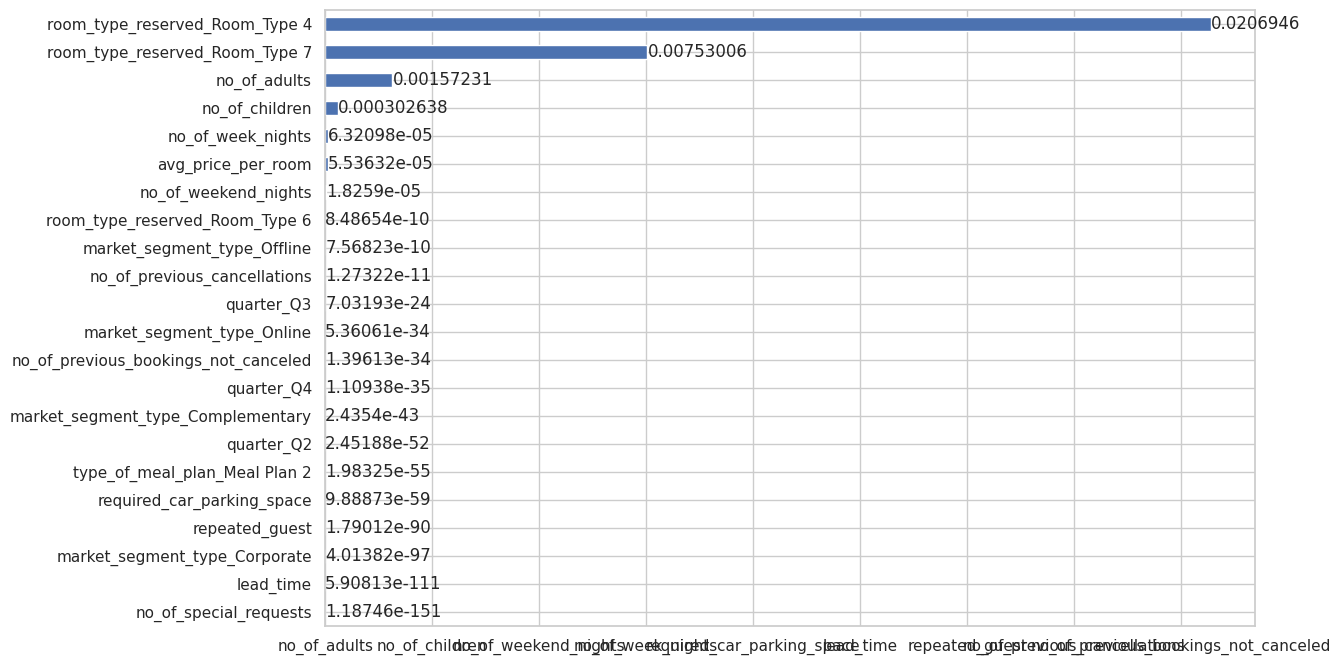

In [64]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
plt.figure(figsize=(12, 8))
fig = p_values.plot(kind='barh')
fig.set_xticklabels(X.columns)
fig.bar_label(fig.containers[0], label_type='edge')
plt.show()

`we see the some col not important and make model not work will so we will drop it from pipline so i don't run this cell again to see result`
`the col not importan that i will drop it ['arrival_date','room_type_reserved_Room_Type 2','room_type_reserved_Room_Type 3','type_of_meal_plan_Not Selected','type_of_meal_plan_Meal Plan 3','arrival_month','room_type_reserved_Room_Type 5']`

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Modeling</b></div>

## Over Sampling

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.2, stratify=over_y, random_state = 42)

## Baseline

In [66]:
def baseline_cls(X_train, y_train, X_test, y_test):


    base = DummyClassifier()
    base.fit(X_train, y_train)
    

    y_pred_base = base.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_pred_base)
    f1 = f1_score(y_test, y_pred_base)
    roc_auc = roc_auc_score(y_test, y_pred_base)
    

    print(f"Your baseline model achieves accuracy = {accuracy}")
    print(f"Your baseline model achieves F1 score = {f1}")
    print(f"Your baseline model achieves ROC AUC = {roc_auc}")

In [67]:
baseline_cls(over_X_train, over_y_train, over_X_test, over_y_test)

Your baseline model achieves accuracy = 0.5
Your baseline model achieves F1 score = 0.0
Your baseline model achieves ROC AUC = 0.5


In [68]:

models = [
    LogisticRegression(random_state=ord("S")),
    DecisionTreeClassifier(random_state=ord("S")),
    RandomForestClassifier(random_state=ord("S")),
    ExtraTreesClassifier(random_state=ord("S")),
    GradientBoostingClassifier(random_state=ord("S")),
    XGBClassifier(random_state=ord("S"), use_label_encoder=False, eval_metric='logloss'),
    AdaBoostClassifier(random_state=ord("S")),
    BaggingClassifier(random_state=ord("S")),
    KNeighborsClassifier(),
    GaussianNB(),

]

In [69]:
def evaluate_models_cls(models, over_X_train, over_y_train, over_X_test, over_y_test, cv):
    results = []

    for model in models:
        start = time.time()  


        cv_results = cross_validate(model, over_X_train, over_y_train, cv=cv,
                                    scoring=['accuracy', 'roc_auc', 'f1'], return_train_score=True)


        train_mean_accuracy = np.mean(cv_results['train_accuracy'])
        train_mean_roc_auc = np.mean(cv_results['train_roc_auc'])
        train_mean_f1 = np.mean(cv_results['train_f1'])


        model.fit(over_X_train, over_y_train)
        test_preds = model.predict(X_test)  

        test_accuracy = accuracy_score(y_test, test_preds)
        test_roc_auc = roc_auc_score(y_test, test_preds)
        test_f1 = f1_score(y_test, test_preds)

        # Store results
        results_dict = {
            'model': model.__class__.__name__,
            'train_accuracy': train_mean_accuracy,
            'test_accuracy': test_accuracy,
            'train_f1': train_mean_f1,
            'test_f1': test_f1,
            'train_roc_auc': train_mean_roc_auc,
            'test_roc_auc': test_roc_auc,
            'time': time.time() - start 
        }
        results.append(results_dict)


    results_df = pd.DataFrame(results)


    results_df.set_index('model', inplace=True)
    results_df = results_df.sort_values(by='test_accuracy', ascending=False)

    return results_df

In [70]:
results_df = evaluate_models_cls(models,over_X_train, over_y_train, over_X_test, over_y_test, cv=5)

In [71]:
results_df

,train_accuracy,test_accuracy,train_f1,test_f1,train_roc_auc,test_roc_auc,time
model,,,,,,,
RandomForestClassifier,0.994247,0.972433,0.994252,0.979257,0.999520,0.970148,30.294390
ExtraTreesClassifier,0.994247,0.970917,0.994242,0.978051,0.999914,0.969936,33.802494
DecisionTreeClassifier,0.994247,0.966368,0.994242,0.974626,0.999914,0.964670,1.299705
BaggingClassifier,0.987367,0.964163,0.987337,0.972894,0.999072,0.963425,8.449444
XGBClassifier,0.905443,0.894418,0.906721,0.920058,0.972189,0.885552,4.570312
KNeighborsClassifier,0.901087,0.882839,0.898793,0.908504,0.972098,0.887560,88.744724
GradientBoostingClassifier,0.832001,0.824535,0.833631,0.863544,0.917180,0.820024,25.686413
AdaBoostClassifier,0.799745,0.788560,0.800482,0.833116,0.883860,0.786638,10.429068
LogisticRegression,0.771730,0.756306,0.766218,0.801035,0.852997,0.766128,3.912229


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Tuning</b></div>

In [72]:


param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


rf_model = RandomForestClassifier(random_state=42)


grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')


start_time = time.time()


grid_search_rf.fit(over_X_train, over_y_train)


end_time = time.time()
time_taken = end_time - start_time


best_rf_model = grid_search_rf.best_estimator_


print("Best parameters for RandomForestClassifier:")
print(grid_search_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForestClassifier:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [73]:
param_grid_et = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
 
}


et_model = ExtraTreesClassifier(random_state=42)


grid_search_et = GridSearchCV(estimator=et_model, param_grid=param_grid_et, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')


start_time = time.time()


grid_search_et.fit(over_X_train, over_y_train)


end_time = time.time()
time_taken = end_time - start_time


best_et_model = grid_search_et.best_estimator_


print("Best parameters for ExtraTreesClassifier:")
print(grid_search_et.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for ExtraTreesClassifier:
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}


In [74]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}


dt_model = DecisionTreeClassifier(random_state=42)


grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')


start_time = time.time()


grid_search_dt.fit(over_X_train, over_y_train)


end_time = time.time()
time_taken = end_time - start_time


best_dt_model = grid_search_dt.best_estimator_


print("Best parameters for DecisionTreeClassifier:")
print(grid_search_dt.best_params_)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Best parameters for DecisionTreeClassifier:
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [75]:
from sklearn import metrics

results = []

rf_results = {
    'Model': 'RandomForestClassifier',
    'Train Accuracy': best_rf_model.score(X_train, y_train),
    'Test Accuracy': best_rf_model.score(X_test, y_test),
    'Train F1': metrics.f1_score(y_train, best_rf_model.predict(X_train)),
    'Test F1': metrics.f1_score(y_test, best_rf_model.predict(X_test)),
    'Train ROC AUC': metrics.roc_auc_score(y_train, best_rf_model.predict_proba(X_train)[:, 1]),
    'Test ROC AUC': metrics.roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]),
    'Time taken for tuning (s)': time_taken  
}

results.append(rf_results)


et_results = {
    'Model': 'ExtraTreesClassifier',
    'Train Accuracy': best_et_model.score(X_train, y_train),
    'Test Accuracy': best_et_model.score(X_test, y_test),
    'Train F1': metrics.f1_score(y_train, best_et_model.predict(X_train)),
    'Test F1': metrics.f1_score(y_test, best_et_model.predict(X_test)),
    'Train ROC AUC': metrics.roc_auc_score(y_train, best_et_model.predict_proba(X_train)[:, 1]),
    'Test ROC AUC': metrics.roc_auc_score(y_test, best_et_model.predict_proba(X_test)[:, 1]),
    'Time taken for tuning (s)': time_taken
}

results.append(et_results)


dt_results = {
    'Model': 'DecisionTreeClassifier',
    'Train Accuracy': best_dt_model.score(X_train, y_train),
    'Test Accuracy': best_dt_model.score(X_test, y_test),
    'Train F1': metrics.f1_score(y_train, best_dt_model.predict(X_train)),
    'Test F1': metrics.f1_score(y_test, best_dt_model.predict(X_test)),
    'Train ROC AUC': metrics.roc_auc_score(y_train, best_dt_model.predict_proba(X_train)[:, 1]),
    'Test ROC AUC': metrics.roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1]),
    'Time taken for tuning (s)': time_taken
}

results.append(dt_results)


results_df = pd.DataFrame(results)


results_df

,Model,Train Accuracy,Test Accuracy,Train F1,Test F1,Train ROC AUC,Test ROC AUC,Time taken for tuning (s)
0,RandomForestClassifier,0.972433,0.972019,0.979539,0.978940,0.993180,0.993349,96.603506
1,ExtraTreesClassifier,0.970021,0.967609,0.977707,0.975595,0.993715,0.993807,96.603506
2,DecisionTreeClassifier,0.965886,0.970917,0.974508,0.978087,0.972400,0.973338,96.603506


## Voting and Stacking 

In [76]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Use the best estimator from GridSearchCV for each model
voting_clf = VotingClassifier(estimators=[
    ('rf', grid_search_rf.best_estimator_),
    ('et', grid_search_et.best_estimator_),
    ('dt', grid_search_dt.best_estimator_)
], voting='soft')

# Fit the Voting Classifier
voting_clf.fit(over_X_train, over_y_train)

# Evaluate the Voting Classifier
voting_train_accuracy = voting_clf.score(over_X_train, over_y_train)
voting_test_accuracy = voting_clf.score(X_test, y_test)

voting_train_f1 = metrics.f1_score(over_y_train, voting_clf.predict(over_X_train))
voting_test_f1 = metrics.f1_score(y_test, voting_clf.predict(X_test))

voting_train_roc_auc = metrics.roc_auc_score(over_y_train, voting_clf.predict_proba(over_X_train)[:, 1])
voting_test_roc_auc = metrics.roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])

print("Voting Classifier Evaluation:")
print(f"Train Accuracy: {voting_train_accuracy}")
print(f"Test Accuracy: {voting_test_accuracy}")
print(f"Train F1: {voting_train_f1}")
print(f"Test F1: {voting_test_f1}")
print(f"Train ROC AUC: {voting_train_roc_auc}")
print(f"Test ROC AUC: {voting_test_roc_auc}")

# Define Stacking Classifier (Logistic Regression as the meta-model)
stacking_clf = StackingClassifier(
    estimators=[('rf', grid_search_rf.best_estimator_), 
                ('et', grid_search_et.best_estimator_), 
                ('dt', grid_search_dt.best_estimator_)],
    final_estimator=LogisticRegression()
)


stacking_clf.fit(over_X_train, over_y_train)


stacking_train_accuracy = stacking_clf.score(over_X_train, over_y_train)
stacking_test_accuracy = stacking_clf.score(X_test, y_test)

stacking_train_f1 = metrics.f1_score(over_y_train, stacking_clf.predict(over_X_train))
stacking_test_f1 = metrics.f1_score(y_test, stacking_clf.predict(X_test))

stacking_train_roc_auc = metrics.roc_auc_score(over_y_train, stacking_clf.predict_proba(over_X_train)[:, 1])
stacking_test_roc_auc = metrics.roc_auc_score(y_test, stacking_clf.predict_proba(X_test)[:, 1])

print("\nStacking Classifier Evaluation:")
print(f"Train Accuracy: {stacking_train_accuracy}")
print(f"Test Accuracy: {stacking_test_accuracy}")
print(f"Train F1: {stacking_train_f1}")
print(f"Test F1: {stacking_test_f1}")
print(f"Train ROC AUC: {stacking_train_roc_auc}")
print(f"Test ROC AUC: {stacking_test_roc_auc}")


Voting Classifier Evaluation:
Train Accuracy: 0.993849938499385
Test Accuracy: 0.971605789110958
Train F1: 0.9938593797973595
Test F1: 0.978635137938187
Train ROC AUC: 0.9997498845234967
Test ROC AUC: 0.9945137639973435

Stacking Classifier Evaluation:
Train Accuracy: 0.9935936859368594
Test Accuracy: 0.971881461061337
Train F1: 0.9936048296326613
Test F1: 0.9788161993769471
Train ROC AUC: 0.9995399549436761
Test ROC AUC: 0.9941674604302586


* **Statcking Classifer is the best**

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Evaluating</b></div>

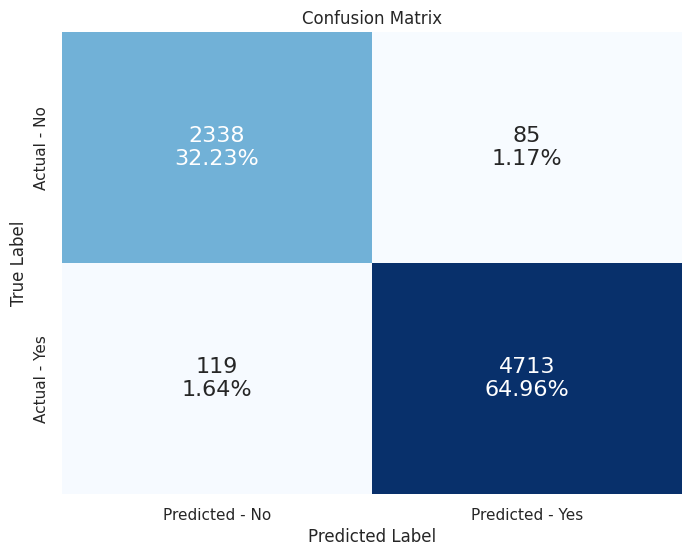

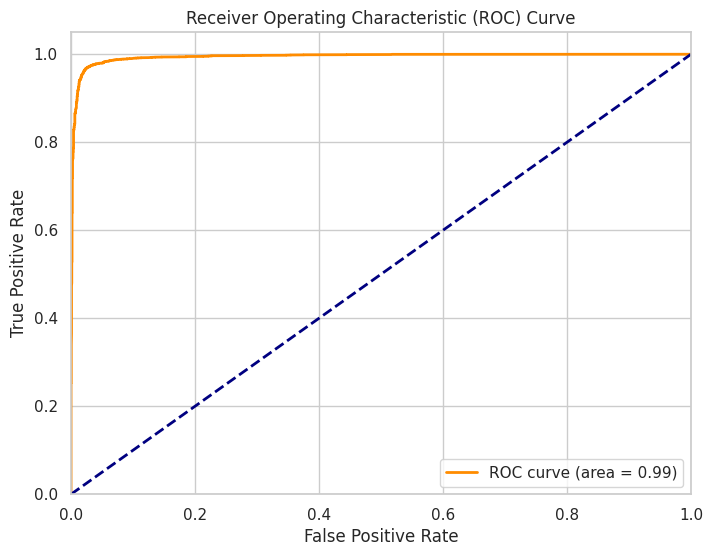

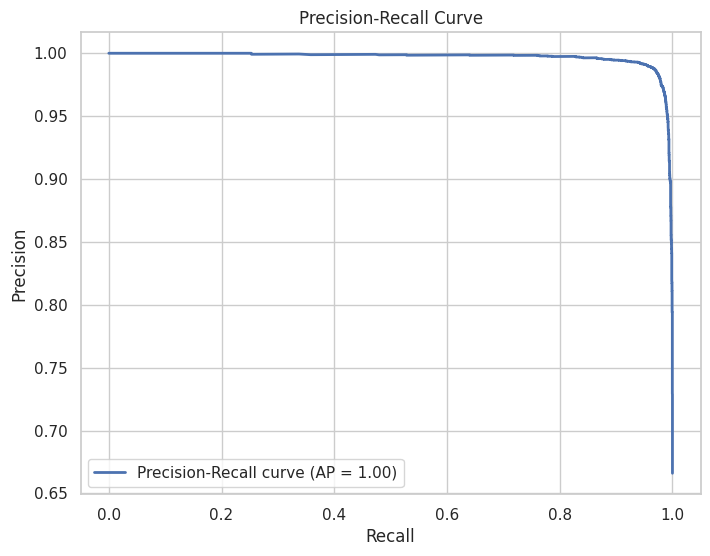

In [77]:
def plot_confusion_matrix(model, X_test, y_test, labels=[0, 1]):
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred, labels=labels)
    
    # Convert confusion matrix to a DataFrame for better visualization
    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"], 
                         columns=["Predicted - No", "Predicted - Yes"])
    
    # Calculate percentages
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()


def plot_roc_curve(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


def plot_precision_recall_curve(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob)
    average_precision = metrics.average_precision_score(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()


plot_confusion_matrix(stacking_clf, X_test, y_test)
plot_roc_curve(stacking_clf, X_test, y_test)
plot_precision_recall_curve(stacking_clf, X_test, y_test)

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Save model</b></div>

In [78]:

import pickle

# Save the trained voting regressor model
with open('hotel_reservations_model.pkl', 'wb') as f:
    pickle.dump(stacking_clf, f)

# Save the full pipeline
with open('fitted_fullpipeline1.pkl', 'wb') as f:
    pickle.dump(full_pipeline1, f)

## Thank you for reviewing my work:
- **I look forward to any feedback.**
- **Suggestions for improvement are highly welcome.**.

